In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('oct1week_sensor_kbg_rounded.csv', sep=';')
print("Data loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())
print("\nData info:")
print(df.info())

Data loaded successfully!
Shape: (3419, 3)

First few rows:
             Timestamp Entity Name  Solar radiation
0  2025-10-01 06:27:00       WSTN1        58.803947
1  2025-10-01 06:28:00       WSTN1        60.593090
2  2025-10-01 06:30:00       WSTN1        66.136345
3  2025-10-01 06:31:00       WSTN1        69.687119
4  2025-10-01 06:32:00       WSTN1        73.281891

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3419 entries, 0 to 3418
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        3419 non-null   object 
 1   Entity Name      3419 non-null   object 
 2   Solar radiation  3419 non-null   float64
dtypes: float64(1), object(2)
memory usage: 80.3+ KB
None


In [2]:
# Kalman Filter Implementation
class KalmanFilter:
    def __init__(self, process_variance, measurement_variance, initial_value=0, initial_estimate_error=1):
        """
        Initialize Kalman Filter
        
        Parameters:
        - process_variance: How much we expect the true value to change (Q)
        - measurement_variance: How much noise is in the measurements (R)
        - initial_value: Initial state estimate
        - initial_estimate_error: Initial estimate uncertainty (P)
        """
        self.process_variance = process_variance  # Q
        self.measurement_variance = measurement_variance  # R
        self.estimate = initial_value  # x
        self.estimate_error = initial_estimate_error  # P
        
    def update(self, measurement):
        """
        Update the Kalman filter with a new measurement
        
        Parameters:
        - measurement: New measurement value
        
        Returns:
        - Filtered estimate
        """
        # Prediction step
        prior_estimate = self.estimate
        prior_estimate_error = self.estimate_error + self.process_variance
        
        # Update step
        kalman_gain = prior_estimate_error / (prior_estimate_error + self.measurement_variance)
        self.estimate = prior_estimate + kalman_gain * (measurement - prior_estimate)
        self.estimate_error = (1 - kalman_gain) * prior_estimate_error
        
        return self.estimate

print("Kalman Filter class defined successfully!")

Kalman Filter class defined successfully!


In [6]:
# Apply Kalman Filter to Solar Radiation data
# Extract the solar radiation values
solar_radiation = df['Solar radiation'].values

# Initialize Kalman Filter
# process_variance: how much the solar radiation changes between measurements
# measurement_variance: noise in the sensor measurements
# You can tune these parameters based on your data characteristics
kf = KalmanFilter(
    process_variance=0.2,  # Low value assumes smooth changes
    measurement_variance=5.0,  # Moderate sensor noise
    initial_value=solar_radiation[0],
    initial_estimate_error=1.0
)

# Apply filter to all measurements
filtered_radiation = []
for measurement in solar_radiation:
    filtered_value = kf.update(measurement)
    filtered_radiation.append(filtered_value)

# Add filtered data to dataframe
df['Solar radiation (Filtered)'] = filtered_radiation

print("Kalman filter applied successfully!")
print("\nComparison of original vs filtered (first 10 rows):")
print(df[['Timestamp', 'Solar radiation', 'Solar radiation (Filtered)']].head(10))

Kalman filter applied successfully!

Comparison of original vs filtered (first 10 rows):
             Timestamp  Solar radiation  Solar radiation (Filtered)
0  2025-10-01 06:27:00        58.803947                   58.803947
1  2025-10-01 06:28:00        60.593090                   59.142687
2  2025-10-01 06:30:00        66.136345                   60.447348
3  2025-10-01 06:31:00        69.687119                   62.153975
4  2025-10-01 06:32:00        73.281891                   64.195686
5  2025-10-01 06:38:00        90.559654                   69.011248
6  2025-10-01 06:39:00        95.295944                   73.797931
7  2025-10-01 06:40:00        98.726143                   78.328445
8  2025-10-01 06:41:00       101.638847                   82.559210
9  2025-10-01 06:43:00       110.457474                   87.618068


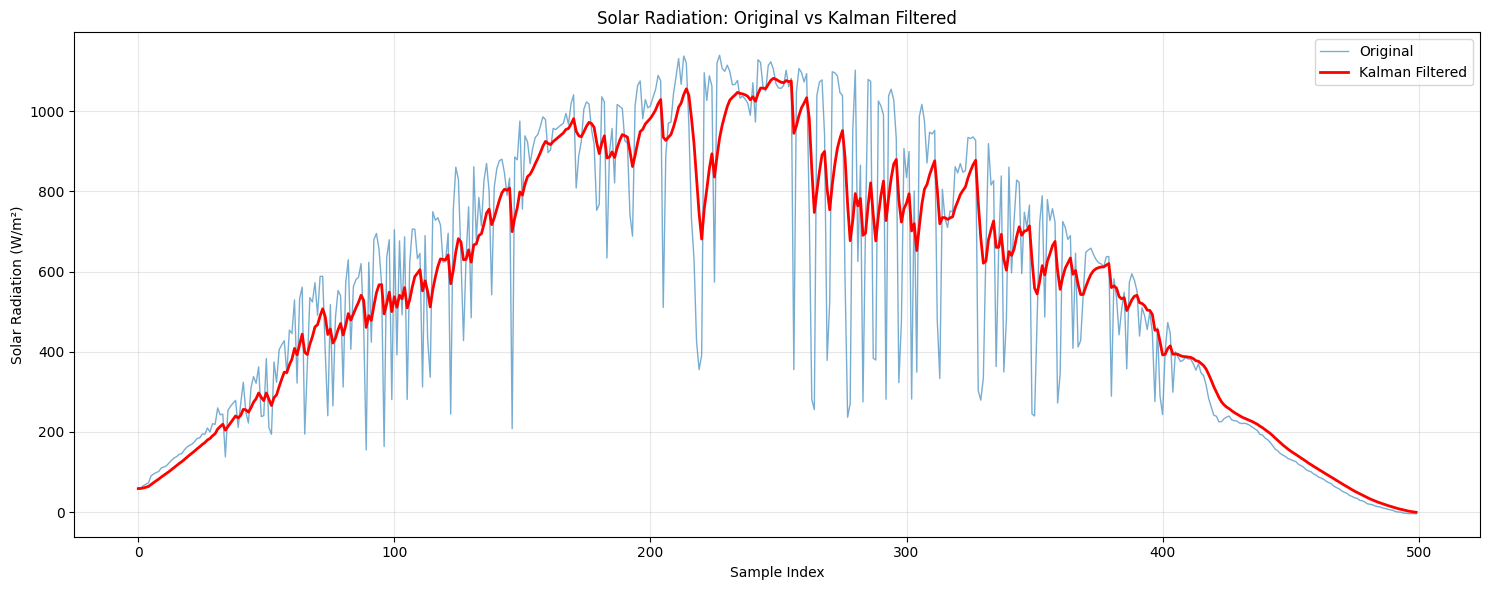


Standard Deviation:
Original: 383.27
Filtered: 350.30
Noise reduction: 8.60%


In [7]:
# Visualize the results
plt.figure(figsize=(15, 6))

# Plot first 500 points for better visibility
sample_size = min(500, len(df))
sample_df = df.head(sample_size)

plt.plot(range(sample_size), sample_df['Solar radiation'].values, 
         label='Original', alpha=0.6, linewidth=1)
plt.plot(range(sample_size), sample_df['Solar radiation (Filtered)'].values, 
         label='Kalman Filtered', color='red', linewidth=2)

plt.xlabel('Sample Index')
plt.ylabel('Solar Radiation (W/m²)')
plt.title('Solar Radiation: Original vs Kalman Filtered')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate statistics
original_std = df['Solar radiation'].std()
filtered_std = df['Solar radiation (Filtered)'].std()
print(f"\nStandard Deviation:")
print(f"Original: {original_std:.2f}")
print(f"Filtered: {filtered_std:.2f}")
print(f"Noise reduction: {((original_std - filtered_std) / original_std * 100):.2f}%")

In [8]:
# Save the filtered data to a new CSV file
output_filename = 'oct1week_sensor_kbg_kalman_filtered.csv'
df.to_csv(output_filename, sep=';', index=False)

print(f"Filtered data saved to: {output_filename}")
print(f"\nOutput file contains {len(df)} rows with the following columns:")
print(df.columns.tolist())

Filtered data saved to: oct1week_sensor_kbg_kalman_filtered.csv

Output file contains 3419 rows with the following columns:
['Timestamp', 'Entity Name', 'Solar radiation', 'Solar radiation (Filtered)']


Output file contains 3419 rows with the following columns:
['Timestamp', 'Entity Name', 'Solar radiation', 'Solar radiation (Filtered)']
